In [1]:
# Lasso Regression
# time-series analysis & regularization techniques

In [ ]:
# Yes, you can explore the "Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.," which is a classic dataset often used for time series analysis. This dataset is available through the statsmodels library and contains the atmospheric CO2 concentration measured monthly. It can be used to practice handling trends, seasonality, and can be modeled using Lasso regression if you introduce lagged terms as predictors to account for autocorrelation.

# Here's how you can load the dataset and prepare it for time series analysis:

# python
# Copy code
# import statsmodels.api as sm
# import pandas as pd

# # Load the CO2 dataset from statsmodels
# co2_dataset = sm.datasets.co2.load_pandas()
# co2 = co2_dataset.data

# # 'co2' is a pandas DataFrame with a 'date' index and 'co2' as the value
# # Handling missing data by forward-filling
# co2.fillna(method='ffill', inplace=True)

# # Print the first few rows
# print(co2.head())
# This dataset can be used to create features such as lags of CO2 concentration to predict future levels and to explore the effect of regularization using Lasso regression on time series data. Remember to include a time component such as rolling windows or lag features to capture the time series nature in your regression model.

In [43]:
import statsmodels.api as sm
import pandas as pd

# Load the CO2 dataset from statsmodels
co2_dataset = sm.datasets.co2.load_pandas()
co2 = co2_dataset.data

# 'co2' is a pandas DataFrame with a 'date' index and 'co2' as the value
# Handling missing data by forward-filling
co2.fillna(method='ffill', inplace=True)

# Print the first few rows
print(co2.head())


              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


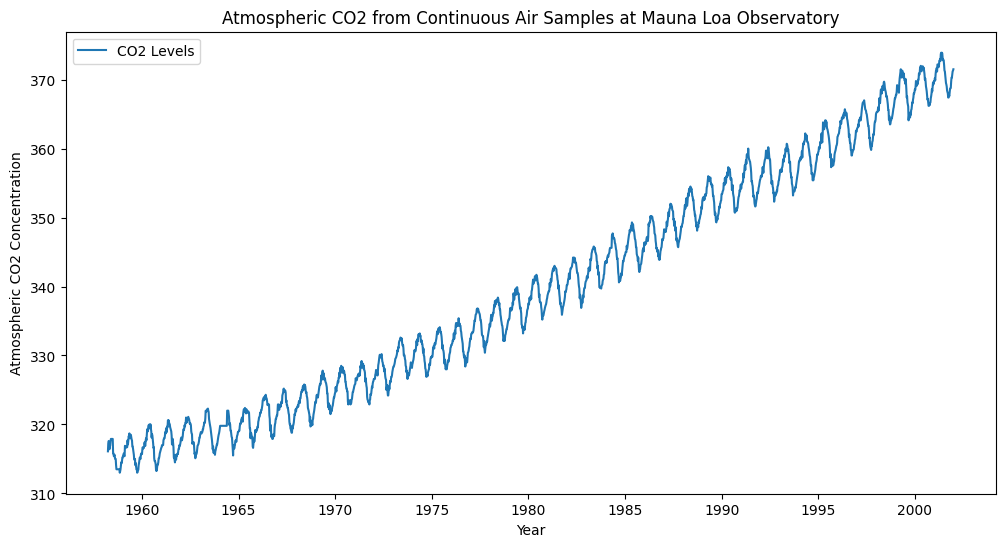

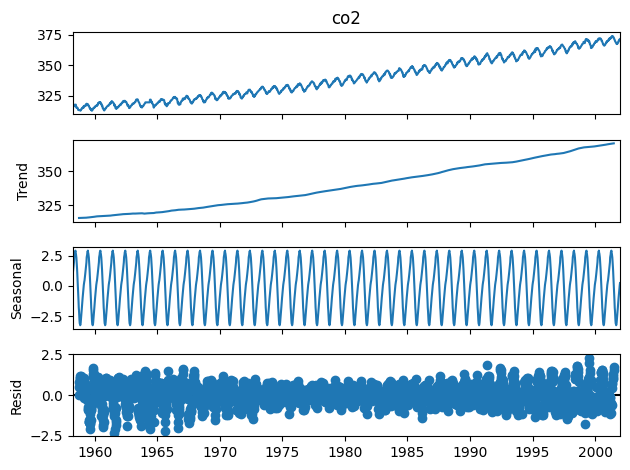

In [44]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the CO2 dataset from statsmodels
co2_dataset = sm.datasets.co2.load_pandas()
co2 = co2_dataset.data

# 'co2' is a pandas DataFrame with a 'date' index and 'co2' as the value
# Handling missing data by forward-filling
co2.fillna(method='ffill', inplace=True)

# Plot the CO2 levels over time
plt.figure(figsize=(12, 6))
plt.plot(co2.index, co2['co2'], label='CO2 Levels')
plt.xlabel('Year')
plt.ylabel('Atmospheric CO2 Concentration')
plt.title('Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory')
plt.legend()
plt.show()

# Decompose the time series to observe the trend, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(co2['co2'], model='additive')
decomposition.plot()
plt.show()


In [7]:
# Import the dataset
from ucimlrepo import fetch_ucirepo 

# Fetch dataset
air_quality = fetch_ucirepo(id=360) 

# Data (as pandas dataframes)
X = air_quality.data.features 
y = air_quality.data.targets
print(X[:5])
print("----------------------")
print(y)

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4 

In [41]:
import ozon3 as ooo

o3 = ooo.Ozon3('b7e0cbecfdcf7b1dd058d0927a26b1bb5f40c125')
data = o3.get_city_air('New Delhi')
data.isnull().sum()

city                       0
latitude                   0
longitude                  0
station                    0
dominant_pollutant         0
timestamp                  0
timestamp_timezone         0
aqi                        0
AQI_meaning                0
AQI_health_implications    0
pm2.5                      0
pm10                       1
o3                         1
co                         1
no2                        1
so2                        1
dew                        0
h                          0
p                          0
t                          0
w                          0
wg                         0
dtype: int64

In [22]:
import pandas as pd

# Load the dataset
file_path = 'air-quality-india-dataset/city_hour.csv'  # Replace with your CSV file path
air_quality_data = pd.read_csv(file_path)

# Display the first few rows
air_quality_data.head()


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [23]:
# Filter for Delhi data
delhi_data = air_quality_data[air_quality_data['City'] == 'Delhi']

# Display the first few rows of Delhi data
delhi_data.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
245172,Delhi,2015-01-01 01:00:00,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80,NaN,NaN
245173,Delhi,2015-01-01 02:00:00,440.44,NaN,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63,NaN,NaN
245174,Delhi,2015-01-01 03:00:00,409.09,NaN,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18,NaN,NaN
245175,Delhi,2015-01-01 04:00:00,436.12,NaN,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82,NaN,NaN
245176,Delhi,2015-01-01 05:00:00,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29,NaN,NaN


In [24]:
delhi_data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,47817.000000,45771.000000,47894.000000,47862.000000,48167.000000,47212.00000,47828.000000,45340.000000,45991.000000,48154.000000,48166.000000,29288.000000,47694.000000
mean,117.665396,233.114669,39.005350,50.763704,58.587961,42.12814,1.979092,15.927299,51.312347,3.546031,17.187459,1.443237,260.148048
std,95.203449,141.873206,50.193275,28.095322,48.902516,20.37413,2.943598,10.147007,34.261109,3.225829,18.466274,4.045554,121.521666
min,0.050000,2.990000,0.050000,2.660000,0.000000,0.57000,0.000000,0.020000,0.060000,0.000000,0.000000,0.000000,22.000000
25%,52.010000,125.205000,10.830000,30.200000,26.190000,29.85000,0.780000,9.640000,26.110000,1.500000,5.120000,0.070000,158.000000
50%,87.490000,204.500000,19.020000,44.260000,42.540000,37.43000,1.090000,13.380000,41.510000,2.590000,11.550000,0.350000,258.000000
75%,155.370000,313.630000,43.710000,64.770000,75.990000,48.90000,1.780000,19.340000,68.250000,4.580000,22.570000,1.652500,347.000000
max,938.500000,1000.000000,497.400000,337.820000,433.780000,485.52000,47.420000,187.050000,497.620000,93.340000,162.000000,158.830000,762.000000


In [25]:
delhi_data.isnull().sum()

City              0
Datetime          0
PM2.5           375
PM10           2421
NO              298
NO2             330
NOx              25
NH3             980
CO              364
SO2            2852
O3             2201
Benzene          38
Toluene          26
Xylene        18904
AQI             498
AQI_Bucket      498
dtype: int64

C:\Users\sachi\AppData\Local\Temp\ipykernel_5968\4261378875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Datetime'] = pd.to_datetime(delhi_data['Datetime'])


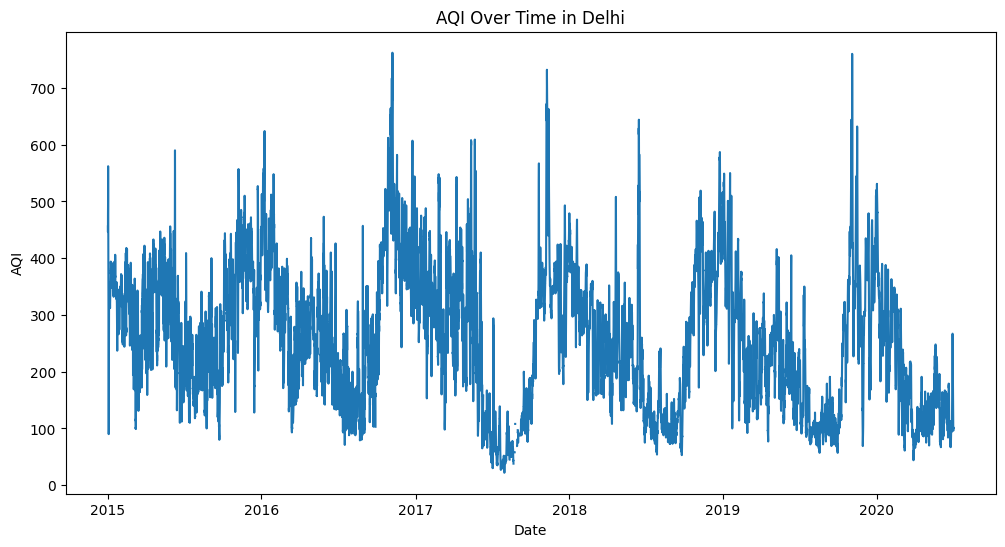

In [26]:
import matplotlib.pyplot as plt

# Convert 'Datetime' to datetime object
delhi_data['Datetime'] = pd.to_datetime(delhi_data['Datetime'])

# Plotting AQI over time
plt.figure(figsize=(12, 6))
plt.plot(delhi_data['Datetime'], delhi_data['AQI'])
plt.title('AQI Over Time in Delhi')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()


In [35]:
delhi_data = air_quality_data[air_quality_data['City'] == 'Delhi'].copy()
delhi_data['Datetime'] = pd.to_datetime(delhi_data['Datetime'])

numeric_cols = delhi_data.select_dtypes(include=['float64', 'int64']).columns
delhi_data[numeric_cols] = delhi_data[numeric_cols].fillna(delhi_data[numeric_cols].mean())


# Ensure 'Datetime' is in the correct format
delhi_data['Datetime'] = pd.to_datetime(delhi_data['Datetime'])

# Select only numeric columns
numeric_cols = delhi_data.select_dtypes(include=['float64', 'int64']).columns
delhi_data[numeric_cols] = delhi_data[numeric_cols].fillna(delhi_data[numeric_cols].mean())


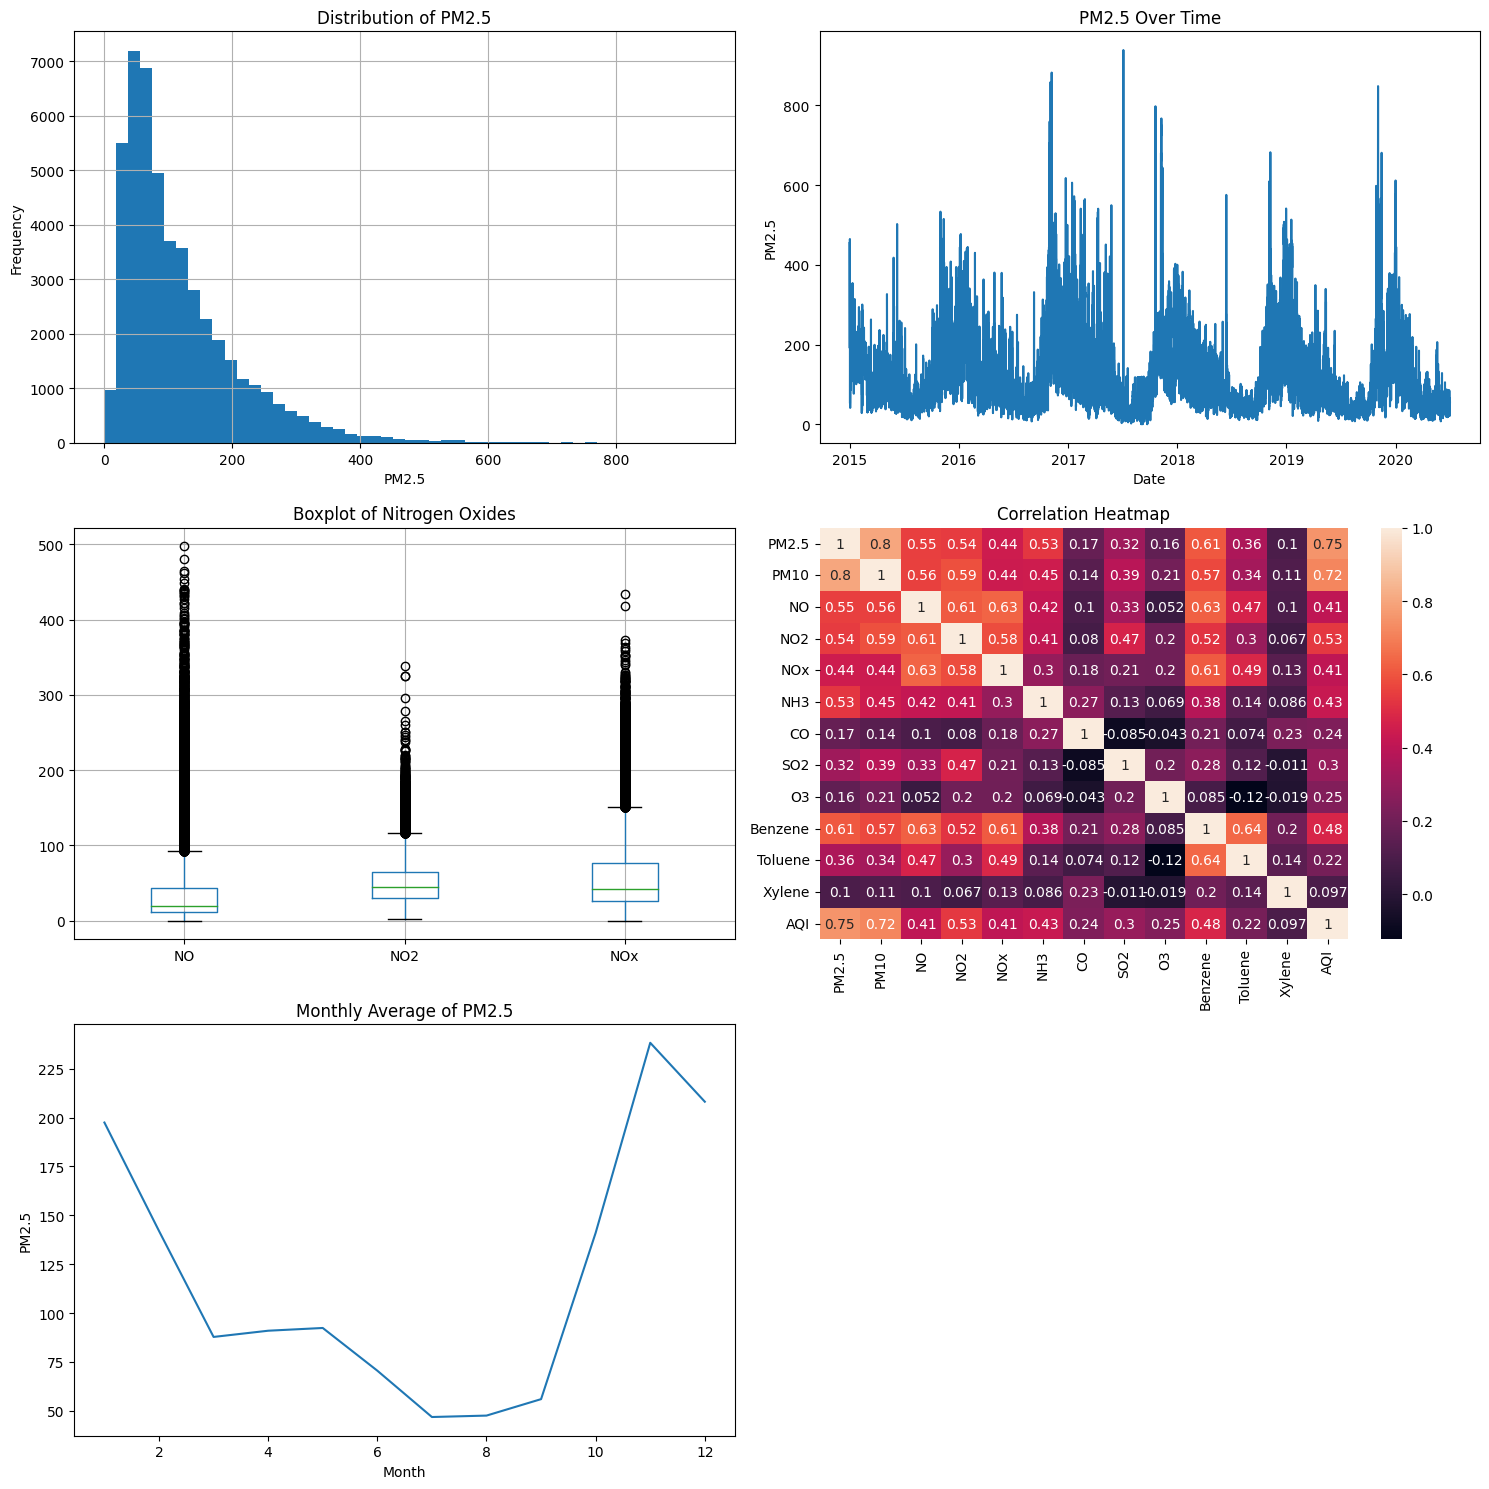

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Histogram of PM2.5
delhi_data['PM2.5'].hist(ax=axes[0, 0], bins=50)
axes[0, 0].set_title('Distribution of PM2.5')
axes[0, 0].set_xlabel('PM2.5')
axes[0, 0].set_ylabel('Frequency')

# Time Series Plot of PM2.5
axes[0, 1].plot(delhi_data['Datetime'], delhi_data['PM2.5'])
axes[0, 1].set_title('PM2.5 Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('PM2.5')

# Boxplot for Nitrogen Oxides
delhi_data.boxplot(column=['NO', 'NO2', 'NOx'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Nitrogen Oxides')

# Correlation Heatmap
sns.heatmap(delhi_data[numeric_cols].corr(), ax=axes[1, 1], annot=True)
axes[1, 1].set_title('Correlation Heatmap')

# Monthly Average of PM2.5
monthly_avg = delhi_data.groupby(delhi_data['Datetime'].dt.month)[numeric_cols].mean()
axes[2, 0].plot(monthly_avg['PM2.5'])
axes[2, 0].set_title('Monthly Average of PM2.5')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('PM2.5')

# Empty plot (or you can add another plot here)
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


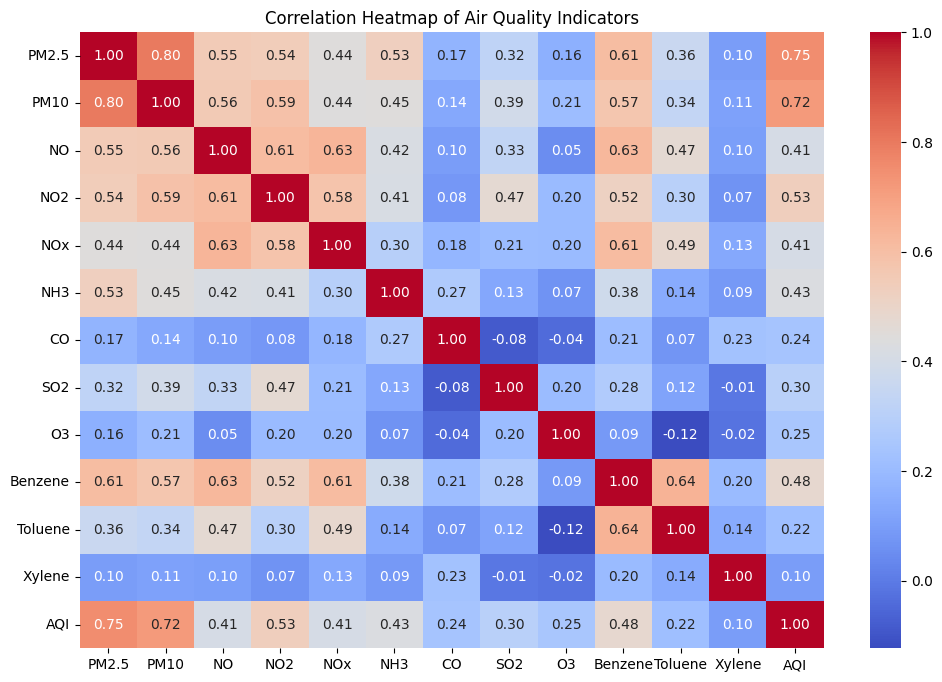

In [38]:
numeric_cols = delhi_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = delhi_data[numeric_cols].corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Air Quality Indicators')
plt.show()